16BCE1123


SAKSHI SINHA

DIGITAL ASSIGNMENT 1

Choose the Titanic dataset, and Decision trees as the model

1.Find the possibility of survival of the person.

2.Perform regularization (pruning) and report results

3.Try various splitting criteira, including some new ones,  check the reference book by Charu Agrawal

4.How can you improve the performance above 85%

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [49]:
#Perprocessing the data

In [3]:
titanic=pd.read_csv("training_titanic_x_y.csv")

In [4]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [5]:
titanic_target=titanic["Survived"]

In [6]:
def getNumber(str):
    if str=="male":
        return 0
    else:
        return 1

In [7]:
del titanic["Name"]
del titanic["Ticket"]
del titanic["Cabin"]
del titanic["Embarked"]
titanic["gender"]=titanic["Sex"].apply(getNumber)
del titanic["Sex"]

In [8]:
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,gender
0,2,29.0,1,0,26.000,1,1
1,3,NaN,0,0,8.050,0,0
2,2,39.0,0,0,26.000,0,0
3,3,29.0,0,4,21.075,0,1
4,3,25.0,0,0,7.050,0,0


In [9]:
meanS= titanic[titanic.Survived==1].Age.mean()

In [10]:
meanS

28.138157894736842

In [11]:
titanic["age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1 ,meanS, titanic["Age"])

In [12]:
meanNS=titanic[titanic.Survived==0].Age.mean()

In [13]:
titanic.age.fillna(meanNS,inplace=True)

In [14]:
del titanic ["Age"]
del titanic["Survived"]

In [15]:
titanic.head()

,Pclass,SibSp,Parch,Fare,gender,age
0,2,1,0,26.000,1,29.000000
1,3,0,0,8.050,0,30.857143
2,2,0,0,26.000,0,39.000000
3,3,0,4,21.075,1,29.000000
4,3,0,0,7.050,0,25.000000


In [16]:
titanic.isnull().sum()

Pclass    0
SibSp     0
Parch     0
Fare      0
gender    0
age       0
dtype: int64

In [81]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Doing Regularization (as any means to prevent overfit) by:

1.Limiting Max Depth


2.setting stricter stopping criterion on when to split a node further (e.g. min gain, number of samples etc.)

In [66]:
X_test.head()

,Pclass,SibSp,Parch,Fare,gender,age
0,2,1,1,36.7500,0,8.000000
1,1,0,0,25.9292,1,49.000000
2,3,0,0,7.7375,0,29.694775
3,2,2,1,27.0000,1,24.000000
4,1,0,0,26.2875,0,36.000000


In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic,titanic_target, test_size=0.25)

In [87]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [88]:
y_pred = clf.predict(x_test)

In [89]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

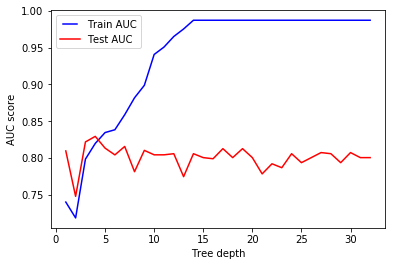

In [90]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b',label='Train AUC')
line2, = plt.plot(max_depths, test_results,'r',label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

We see that our model overfits for large depth values. 
The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

2.Min_samples_split


Min_samples_split represents the minimum number of samples required to split an internal node. 
This can vary between considering at least one sample at each node to considering 
all of the samples at each node. When we increase this parameter, 
the tree becomes more constrained as it has to consider more samples at each node.
Here we will vary the parameter from 10% to 100% of the samples

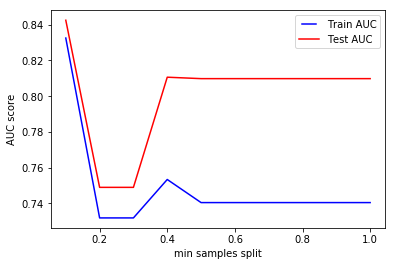

In [93]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

3.min_samples_leaf


min_samples_leaf is The minimum number of samples required to be at a leaf node. 
This parameter is similar to min_samples_splits, however, this describe the minimum number 
of samples of samples at the leafs, the base of the tree.

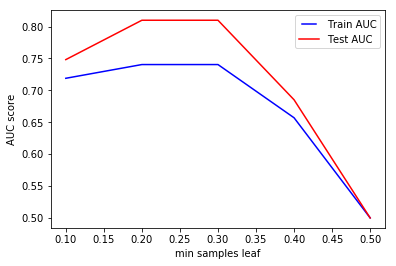

In [96]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

Increasing this value may cause underfitting.

4.max_features


max_features represents the number of features to consider when looking for the best split.

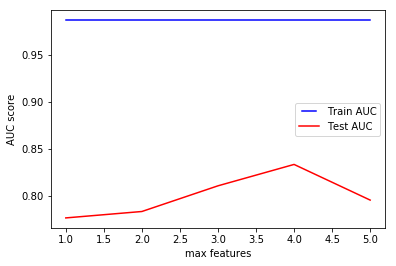

In [98]:
max_features = list(range(1,titanic.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [36]:
#Changing decision tree parameters to get the best results

In [103]:
# Setting parameters
sza = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 2,  min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2)
sza.fit(titanic,titanic_target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [104]:
sza.score(titanic,titanic_target) * 100

77.694610778443121

In [113]:
# Setting parameters
tree = DecisionTreeClassifier()
tree.fit(titanic,titanic_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [114]:
tree.score(titanic,titanic_target) * 100

98.952095808383234

In [107]:
# Setting parameters
spa = DecisionTreeClassifier(criterion="gini",splitter = "random",max_depth = 3,min_samples_split = 10,
                              min_samples_leaf = 2, max_features = 2)
spa.fit(titanic,titanic_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [108]:
spa.score(titanic,titanic_target) * 100

79.790419161676652

Improving Accuracy


The prediction accuracy of decision trees improved by using Boosting algorithms.

The basic idea behind boosting is converting many weak learners to form a single strong learner. 

Weak learner is a learner that will always do better than chance, when it tries to label the data, no matter what the distribution over the training data is. 

Doing better than chance means we are always going to have an error rate which is less than 1/2. 

This means that the learner algorithm is always going to learn something, and will not always be completely accurate i.e., it is weak and poor when it comes to learning the relationships between inputs and target.

It also means a rule formed using a single predictor/classifier is not powerful individually.

we combine weak rules to form a single strong rule, which will then be used as our model.